In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_absolute_error, f1_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/techno/companies/data.csv')
df.head()

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,True,False,1.0,6935.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,True,False,1.0,7665.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,True,False,1.0,6570.0,6570.0


In [3]:
df.drop(['isClosed'], axis=1,inplace=True)

**Encoding the status column**

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'Category' column
df['status'] = label_encoder.fit_transform(df['status'])

0 -> aquired

1 ->

2 ->

3 -> operating

In [5]:
df.head()

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,IRL,ISR,NLD,RUS,SGP,SWE,USA,other.1,Age_in_Days,Age_in_Days.1
0,3,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,False,True,False,6935.0,6935.0
1,0,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
2,3,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,False,True,False,6205.0,6205.0
3,3,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,False,True,False,7665.0,7665.0
4,3,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,False,True,False,6570.0,6570.0


In [6]:
X = df.drop("status", axis=1)
y = df["status"]

In [7]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**XG Boost**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_squared_error, mean_absolute_error, f1_score
import itertools  # Import itertools module

# Definition of function to compute evaluation metrics
def metric(x_train, y_train, y_test, y_pred, model):

    # Fit the model on training data
    model.fit(x_train, y_train)

    # Compute predictions on training data
    y_train_pred = model.predict(x_train)

    # Compute train accuracy
    train_acc = accuracy_score(y_train, y_train_pred)

    # Compute test accuracy
    test_acc = accuracy_score(y_test, y_pred)

    # Compute precision score
    precision = precision_score(y_test, y_pred, average='macro')

    # Compute recall score
    recall = recall_score(y_test, y_pred, average='macro')

    # Compute mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Compute mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Compute F1_score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Printing computed metrics
    print('Train accuracy score:', train_acc*100, '%')
    print('Test accuracy score:', test_acc*100, "%")
    print('Precision score:', precision)
    print('Recall score:', recall)
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('F1-score:', f1)

    # Printing classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Plotting confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Returning computed metrics
    return test_acc, precision, recall, mse, mae, f1

# Definition of function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    # Normalizing confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [9]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=4)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [10]:
y_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)

0.9509851815665201


array([[ 402,   92,    0,    0],
       [ 118,  232,    0,    0],
       [   0,    0,   22,   77],
       [   0,    0,   14, 5184]])

Train accuracy score: 99.91623621387686 %
Test accuracy score: 95.098518156652 %
Precision score: 0.771400354035943
Recall score: 0.6740378009179775
Mean Squared Error: 0.04901481843347989
Mean Absolute Error: 0.04901481843347989
F1-score: 0.6996379983291495
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       494
           1       0.72      0.66      0.69       350
           2       0.61      0.22      0.33        99
           3       0.99      1.00      0.99      5198

    accuracy                           0.95      6141
   macro avg       0.77      0.67      0.70      6141
weighted avg       0.95      0.95      0.95      6141



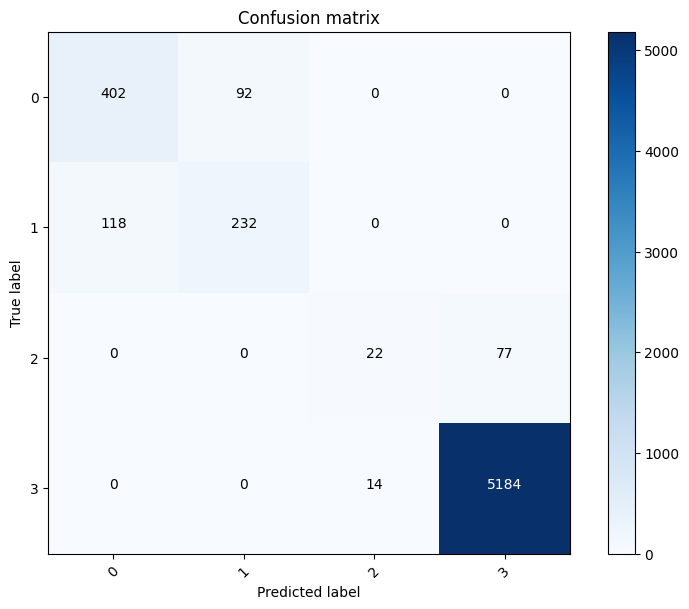

(0.9509851815665201,
 0.771400354035943,
 0.6740378009179775,
 0.04901481843347989,
 0.04901481843347989,
 0.6996379983291495)

In [12]:
metric(X_train, y_train, y_test, y_pred, xgb_model)

In [13]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 150, 200, 250, 300]
}

In [14]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')

In [15]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [16]:
y_pred = grid_search.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 441,   53,    0,    0],
       [ 138,  212,    0,    0],
       [   0,    0,   15,   84],
       [   0,    0,    6, 5192]])

In [17]:
accuracy_score(y_test,y_pred)

0.9542419801335288

Train accuracy score: 95.80483037833311 %
Test accuracy score: 95.42419801335288 %
Precision score: 0.8150056482464061
Recall score: 0.6621969244312859
Mean Squared Error: 0.04575801986647126
Mean Absolute Error: 0.04575801986647126
F1-score: 0.6882081491906706
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       494
           1       0.80      0.61      0.69       350
           2       0.71      0.15      0.25        99
           3       0.98      1.00      0.99      5198

    accuracy                           0.95      6141
   macro avg       0.82      0.66      0.69      6141
weighted avg       0.95      0.95      0.95      6141



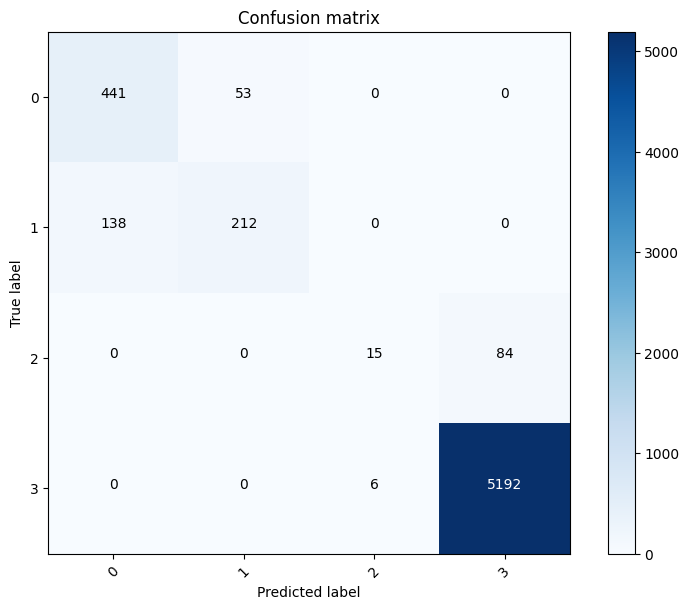

(0.9542419801335288,
 0.8150056482464061,
 0.6621969244312859,
 0.04575801986647126,
 0.04575801986647126,
 0.6882081491906706)

In [18]:
metric(X_train, y_train, y_test, y_pred, grid_search)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss'  # Evaluation metric
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred.argmax(axis=1)))


In [ ]:
y_pred = y_pred.argmax(axis=1)
y_pred = pd.Series(y_pred_classes)
y_pred.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
metric(y_test, y_pred, X_train, y_train, bst)

In [ ]:
confusion_matrix(y_test, y_pred)